In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/capstone/')

In [ ]:
import pandas as pd
df_1 = pd.read_csv('Final_Articles_Data_25June.csv', engine="python")
df_1.head(5)

,Unnamed: 0,Unnamed: 0.1,Article URL,Headline,Article Text,Sub Domain,Domain,Author,Cleaned_Article,Cleaned_Headline,Cleaned_Author,Word_Count,Article_Size
0,0,0.0,https://www.entrepreneur.com/article/370874,\n\t\t\t\tIs Launching a New Brand the Right M...,\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t10...,Branding,Marketing,Melissa Packham,One of the most common challenges I see client...,Is Launching a New Brand the Right Move for Yo...,Melissa Packham,1013,Large
1,1,1.0,https://www.entrepreneur.com/article/372254,\n\t\t\t\t3 Reasons Simple Isn't Always Better...,\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t10...,Branding,Marketing,Zaheer Dodhia,"Lets say that, like me, youve been thinking ab...",3 Reasons Simple Isn't Always Better When It C...,Zaheer Dodhia,882,Medium
2,2,2.0,https://www.entrepreneur.com/article/368356,\n\t\t\t\tFrom Idea to Revenue: A Six-Step For...,\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t10...,Launching a Business,Marketing,Jessica O'Connell,"If youre like most entrepreneurs, you may have...",From Idea to Revenue A Six-Step Formula to Lau...,Jessica O'Connell,1409,Large
3,3,3.0,https://www.entrepreneur.com/article/373825,\n\t\t\t\tAvoid This Common Mistake When Writi...,\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t10...,Writing a Book,Marketing,R. Paulo Delgado,I had an interesting project come across my de...,Avoid This Common Mistake When Writing Your Fi...,R. Paulo Delgado,952,Medium
4,4,4.0,https://www.entrepreneur.com/article/372679,\n\t\t\t\tIs it Time to Say RIP to RFPs?\n\t\t\t,"\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t9,...",Entrepreneurs,Marketing,Heather Ripley,"In a world where personal touch matters, why a...",Is it Time to Say RIP to RFPs,Heather Ripley,723,Medium


In [ ]:
df = df_1.filter(['Domain','Cleaned_Article','Cleaned_Headline','Cleaned_Author','Word_Count' ,'Article_Size'], axis=1)
df.head()

,Domain,Cleaned_Article,Cleaned_Headline,Cleaned_Author,Word_Count,Article_Size
0,Marketing,One of the most common challenges I see client...,Is Launching a New Brand the Right Move for Yo...,Melissa Packham,1013,Large
1,Marketing,"Lets say that, like me, youve been thinking ab...",3 Reasons Simple Isn't Always Better When It C...,Zaheer Dodhia,882,Medium
2,Marketing,"If youre like most entrepreneurs, you may have...",From Idea to Revenue A Six-Step Formula to Lau...,Jessica O'Connell,1409,Large
3,Marketing,I had an interesting project come across my de...,Avoid This Common Mistake When Writing Your Fi...,R. Paulo Delgado,952,Medium
4,Marketing,"In a world where personal touch matters, why a...",Is it Time to Say RIP to RFPs,Heather Ripley,723,Medium


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Word_Count,29631.0,802.188553,427.701287,51.0,549.0,766.0,978.0,5146.0


In [ ]:
df.isnull().sum()  

Domain              0
Cleaned_Article     0
Cleaned_Headline    0
Cleaned_Author      0
Word_Count          0
Article_Size        0
dtype: int64

In [ ]:
#https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  chec ths once

#Mesuring the dimentions of the data

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install textstat

     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 1.9MB 10.1MB/s 


In [ ]:
! pip install textblob

In [ ]:
import textstat 
import textblob
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from textblob import TextBlob

In [ ]:
stop = stopwords.words('english')

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [ ]:
df['Char_Count'] = df['Cleaned_Article'].str.len()
df['Avg_Word'] = df['Cleaned_Article'].apply(lambda x: avg_word(x))
df['Stopwords_Count'] = df['Cleaned_Article'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics_Count'] = df['Cleaned_Article'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['Upper_Count'] = df['Cleaned_Article'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['Syllable_Count'] = df['Cleaned_Article'].apply(lambda x: textstat.syllable_count(x))
df['Sentence_Count'] = df['Cleaned_Article'].apply(lambda x: textstat.sentence_count(x))
df['Difficult_Words_Count'] = df['Cleaned_Article'].apply(lambda x: textstat.difficult_words(x))
df['length'] = df['Cleaned_Article'].astype(str).apply(len)

In [ ]:
def readability(text):
    readability = textstat.flesch_reading_ease(text) #The Flesch Reading Ease formula
    return readability

In [ ]:
df['Readability'] = df['Cleaned_Article'].apply(readability)

In [ ]:
#convertng into category
def cat(x):
    global ret    
    if (x < 10.0):
        ret = "Professional"  
    elif ((x > 10.0)and (x<= 30.0)):
        ret = "Graduate"
    elif ((x > 30.0)and (x<= 50.0)):
        ret = "College"
    elif ((x > 50.0)and (x<= 60.0)):
        ret = "Grade 10"
    elif ((x > 60.0)and (x<= 70.0)):
        ret = "Grade 8"
    elif ((x > 70.0)and (x<= 80.0)):
        ret = "Grade 7"
    elif ((x > 80.0)and (x<= 90.0)):
        ret = "Grade 6"
    elif (x > 90.0):
        ret = "Grade 5"
    return ret

In [ ]:
df['F_Readability'] = df.Readability.apply(cat)

In [ ]:
df['Polarity'] = df['Cleaned_Article'].map(lambda text: TextBlob(text).sentiment.polarity)  # range from -1 to 1

In [ ]:
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Negative' if x <= 0 else ('Neutral' if x <0.1 else 'Positive'))

In [ ]:
df['Subjectivity'] = df['Cleaned_Article'].map(lambda text: TextBlob(text).sentiment.subjectivity) 
# Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
# i.e. 0.75 subjectivity refers that mostly it is a public opinion and not a factual information.

#lemetizing text

In [ ]:
nltk.download('wordnet')
from textblob import Word
stop = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['Cleaned_lemetized_Article'] = df['Cleaned_Article'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df['Cleaned_lemetized_Article'] = df['Cleaned_lemetized_Article'].str.replace('[^\w\s]','')
df['Cleaned_lemetized_Article'] = df['Cleaned_lemetized_Article'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Cleaned_lemetized_Article'] = df['Cleaned_lemetized_Article'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
freq = pd.Series(' '.join(df['Cleaned_lemetized_Article']).split()).value_counts()[:50]  #50 most frequent words
freq

business        115629
company          98827
time             66968
people           66152
make             64411
one              62042
customer         56047
new              54549
way              53417
get              52635
need             51407
like             49447
work             45748
also             42903
employee         41740
dont             40119
say              39840
product          39232
year             38203
want             38050
help             37387
take             35705
marketing        35624
youre            35513
know             32933
even             32837
brand            32318
team             32151
many             31983
percent          31917
entrepreneur     30972
thing            30577
may              30529
use              29715
would            27962
content          27755
first            27432
service          27219
social           27004
good             26154
could            25709
best             25110
sale             25022
day        

In [ ]:
freq = list(freq.index)
df['Cleaned_lemetized_Article'] = df['Cleaned_lemetized_Article'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))   #Removng most frequent articles

In [ ]:
freq1 = pd.Series(' '.join(df['Cleaned_lemetized_Article']).split()).value_counts()[-100:] #100 least frequent words
freq1

dayrevealing                    1
industrybasic                   1
pathgood                        1
bylast                          1
employeesgo                     1
                               ..
reppin                          1
bartendersconclusionalthough    1
standardsbmightyare             1
finestmaybe                     1
fromsecond                      1
Length: 100, dtype: int64

In [ ]:
freq1 = list(freq1.index)
df['Cleaned_lemetized_Article'] = df['Cleaned_lemetized_Article'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1)) ##Removng the least frequent articles

In [ ]:
df['word_count_lemetized'] = df['Cleaned_lemetized_Article'].apply(lambda x: len(str(x).split(" ")))

#Analysis

In [ ]:
df['Cleaned_Author'].value_counts()

Catherine Clifford                                    527
Kim Lachance Shandrow                                 515
Nina Zipkin                                           426
Jason Fell                                            408
Geoff Weiss                                           354
                                                     ... 
Boris Groysberg, Evan M.S. Hecht, and Abhijit Naik      1
Margaret Kelsey                                         1
Brittney Lynn                                           1
Andy Hunt                                               1
Ben Decker                                              1
Name: Cleaned_Author, Length: 5852, dtype: int64

In [ ]:
df['Article_Size'].value_counts()

Medium    16576
Large      6891
Small      6164
Name: Article_Size, dtype: int64

In [ ]:
data_crosstab = pd.crosstab(df['Domain'],
                            df['Article_Size'], 
                               margins = False)
data_crosstab

Article_Size,Large,Medium,Small
Domain,,,
Finance,1031,2553,1016
Leadership,1736,3889,642
Marketing,1632,4572,1263
Strategy,1578,3007,620
Technology,914,2555,2623


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Word_Count,29631.0,802.188553,427.701287,51.000000,549.000000,766.000000,978.000000,5146.000000
Char_Count,29631.0,4852.241875,2568.834085,303.000000,3306.500000,4640.000000,5952.000000,32549.000000
Avg_Word,29631.0,5.100873,0.309834,3.588235,4.888202,5.089155,5.291420,7.572254
Stopwords_Count,29631.0,314.001822,174.100893,13.000000,208.000000,300.000000,389.000000,2318.000000
numerics_Count,29631.0,4.252236,4.684824,0.000000,1.000000,3.000000,6.000000,284.000000
Upper_Count,29631.0,8.422463,10.719099,0.000000,2.000000,5.000000,11.000000,557.000000
Syllable_Count,29631.0,1224.901151,650.843088,72.000000,830.000000,1168.000000,1506.500000,8567.000000
Sentence_Count,29631.0,31.280922,18.986157,1.000000,20.000000,29.000000,39.000000,252.000000
Difficult_Words_Count,29631.0,140.776754,68.008110,7.000000,95.000000,134.000000,176.000000,818.000000
length,29631.0,4852.241875,2568.834085,303.000000,3306.500000,4640.000000,5952.000000,32549.000000


In [ ]:
a = df.groupby(by=['Domain']).describe()
a

Word_Count                          ... word_count_lemetized               
                count        mean         std  ...                  50%    75%     max
Domain                                         ...                                    
Finance        4600.0  774.901522  415.980181  ...                358.0  482.0  1962.0
Leadership     6267.0  883.474549  412.366250  ...                372.0  477.0  2234.0
Marketing      7467.0  809.268113  399.455100  ...                354.0  449.0  2378.0
Strategy       5205.0  888.967531  423.337173  ...                389.0  486.0  2778.0
Technology     6092.0  656.350295  447.715950  ...                291.0  427.0  3926.0

[5 rows x 112 columns]

In [ ]:
b = df.groupby(by=['Domain']).describe().T
b

Domain                          Finance   Leadership  ...     Strategy   Technology
Word_Count           count  4600.000000  6267.000000  ...  5205.000000  6092.000000
                     mean    774.901522   883.474549  ...   888.967531   656.350295
                     std     415.980181   412.366250  ...   423.337173   447.715950
                     min      51.000000    51.000000  ...    55.000000    54.000000
                     25%     526.750000   658.000000  ...   682.000000   342.000000
...                                 ...          ...  ...          ...          ...
word_count_lemetized min      24.000000    31.000000  ...    31.000000    30.000000
                     25%     261.000000   294.000000  ...   303.000000   181.000000
                     50%     358.000000   372.000000  ...   389.000000   291.000000
                     75%     482.000000   477.000000  ...   486.000000   427.000000
                     max    1962.000000  2234.000000  ...  2778.000000  3926.000000

[112 rows x 5 columns]

In [ ]:
(df['Word_Count'] < 100).value_counts()

False    29521
True       110
Name: Word_Count, dtype: int64

In [ ]:
(df['Readability'] < -4000).value_counts()

False    29631
Name: Readability, dtype: int64

In [ ]:
(df['Word_Count'] > 5000).value_counts()

False    29630
True         1
Name: Word_Count, dtype: int64

In [ ]:
df.groupby('Domain').sum()['Word_Count'].sort_values(ascending=False)

Domain
Marketing     6042805
Leadership    5536735
Strategy      4627076
Technology    3998486
Finance       3564547
Name: Word_Count, dtype: int64

In [ ]:
data_crosstab1 = pd.crosstab(df['Sentiment'],
                            df['Domain'], 
                               margins = False)
data_crosstab1

Domain,Finance,Leadership,Marketing,Strategy,Technology
Sentiment,,,,,
Negative,126,77,85,44,158
Neutral,1470,1013,934,698,1740
Positive,3004,5177,6448,4463,4194


In [ ]:
df['Readability'] = df['Readability'].replace({-4761.280000: 0})  # removed one outliner

In [ ]:
data_crosstab2 = pd.crosstab(df['Domain'],
                            df['F_Readability'], 
                               margins = False)
data_crosstab2

F_Readability,College,Grade 10,Grade 5,Grade 6,Grade 7,Grade 8,Graduate,Professional
Domain,,,,,,,,
Finance,2089,1312,0,1,82,572,447,97
Leadership,2495,1882,1,27,291,1075,425,71
Marketing,2928,2303,0,14,325,1341,450,106
Strategy,2124,1491,0,10,183,888,432,77
Technology,2738,1517,0,5,104,706,781,241


In [ ]:
df.corr()

,Word_Count,Char_Count,Avg_Word,Stopwords_Count,numerics_Count,Upper_Count,Syllable_Count,Sentence_Count,Difficult_Words_Count,length,Readability,Polarity,Subjectivity,word_count_lemetized
Word_Count,1.000000,0.994511,-0.124855,0.982710,0.414492,0.499342,0.991398,0.866917,0.903274,0.994511,0.097601,0.073939,0.088151,0.977460
Char_Count,0.994511,1.000000,-0.039295,0.968719,0.415794,0.477795,0.998658,0.849175,0.934299,1.000000,0.046663,0.069767,0.077931,0.985602
Avg_Word,-0.124855,-0.039295,1.000000,-0.205192,-0.003375,-0.185691,-0.022466,-0.220821,0.178828,-0.039295,-0.612498,-0.082931,-0.175885,-0.010920
Stopwords_Count,0.982710,0.968719,-0.205192,1.000000,0.346244,0.448053,0.965449,0.848327,0.854065,0.968719,0.127654,0.100733,0.128724,0.929233
numerics_Count,0.414492,0.415794,-0.003375,0.346244,1.000000,0.340303,0.411471,0.329613,0.376784,0.415794,-0.006647,-0.021212,-0.090097,0.463860
Upper_Count,0.499342,0.477795,-0.185691,0.448053,0.340303,1.000000,0.475329,0.458366,0.393680,0.477795,0.110398,-0.045100,-0.050693,0.520605
Syllable_Count,0.991398,0.998658,-0.022466,0.965449,0.411471,0.475329,1.000000,0.842405,0.940530,0.998658,0.026630,0.065715,0.073309,0.983467
Sentence_Count,0.866917,0.849175,-0.220821,0.848327,0.329613,0.458366,0.842405,1.000000,0.739575,0.849175,0.384193,0.075546,0.105123,0.831376
Difficult_Words_Count,0.903274,0.934299,0.178828,0.854065,0.376784,0.393680,0.940530,0.739575,1.000000,0.934299,-0.096208,0.035280,0.039737,0.933590
length,0.994511,1.000000,-0.039295,0.968719,0.415794,0.477795,0.998658,0.849175,0.934299,1.000000,0.046663,0.069767,0.077931,0.985602


#Visualization

In [ ]:
import seaborn as sns

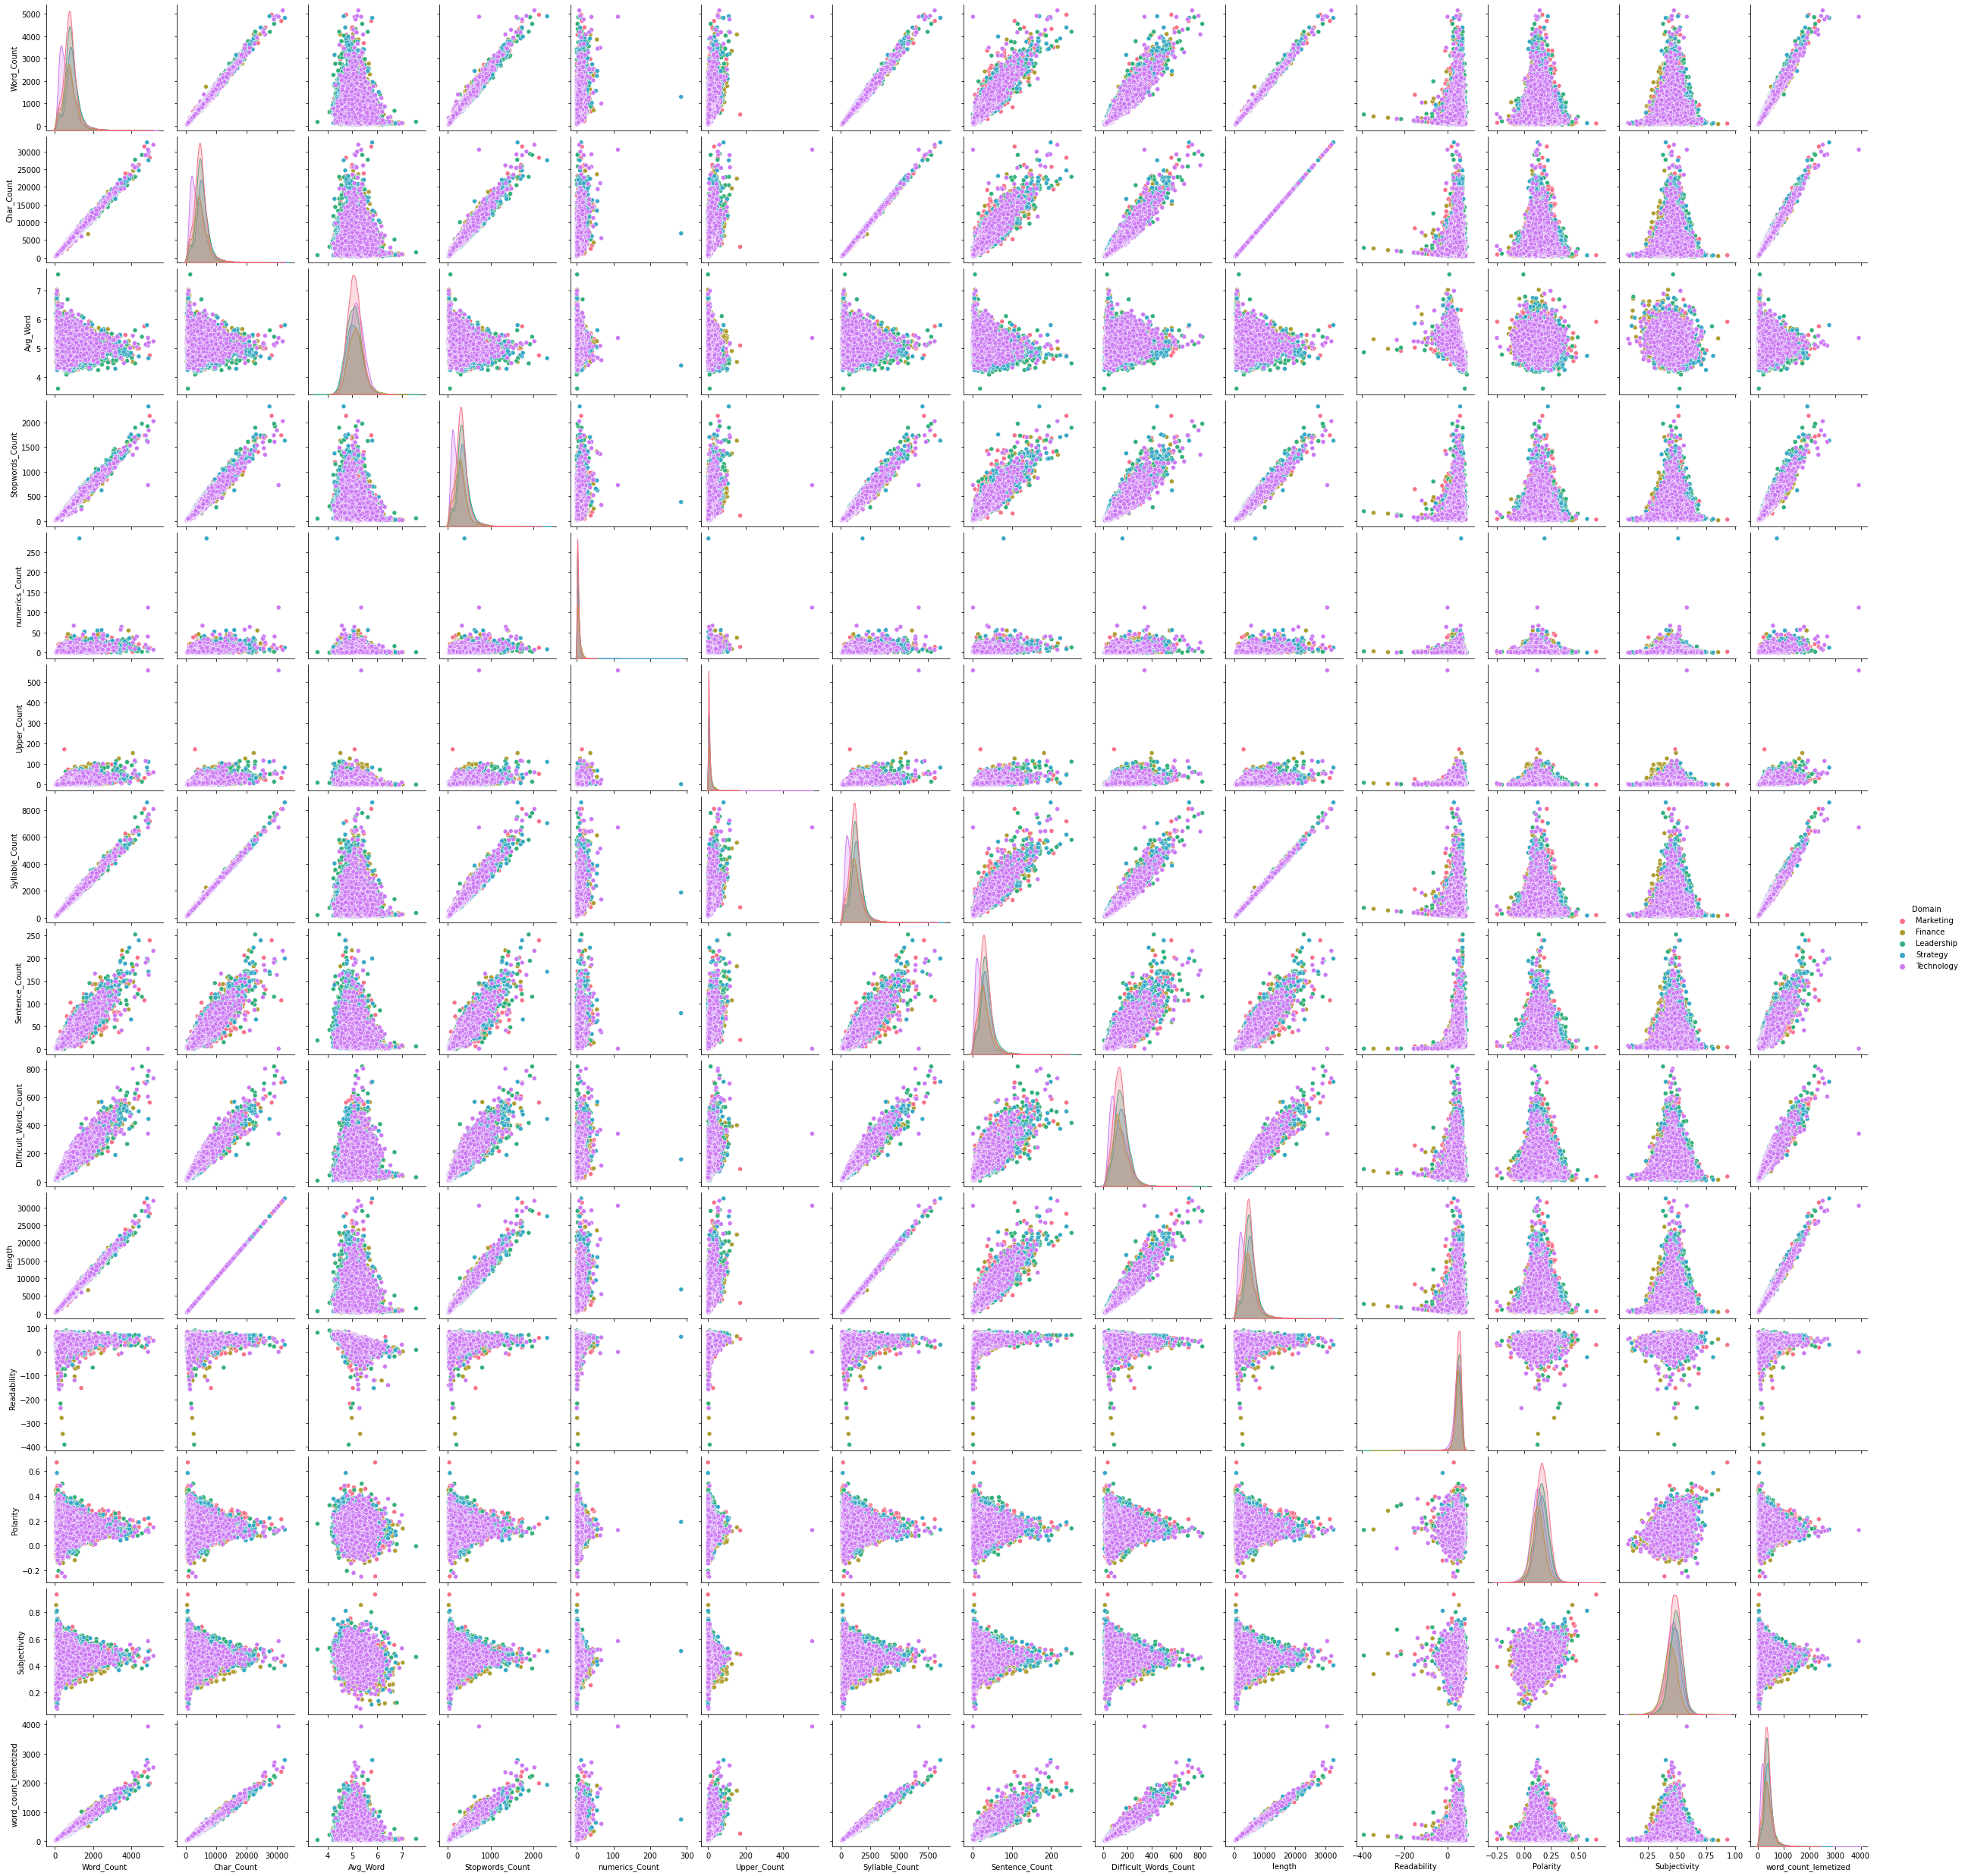

In [ ]:
sns.pairplot(df, hue="Domain", palette="husl")

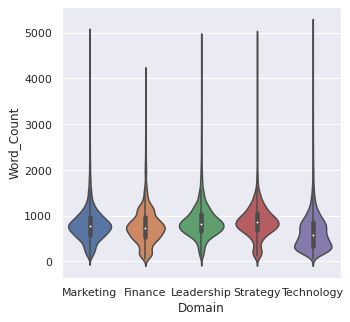

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.violinplot(x="Domain", y="Word_Count", data=df)

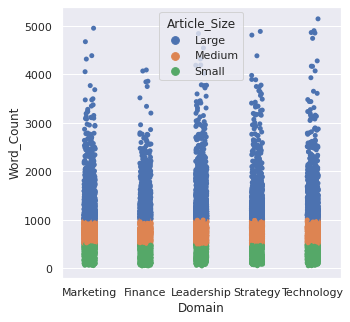

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.stripplot(x="Domain", y="Word_Count", hue="Article_Size", data=df)

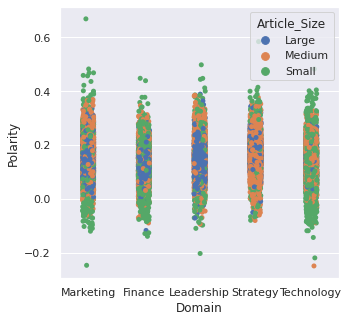

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.stripplot(x="Domain", y="Polarity", hue="Article_Size", data=df)

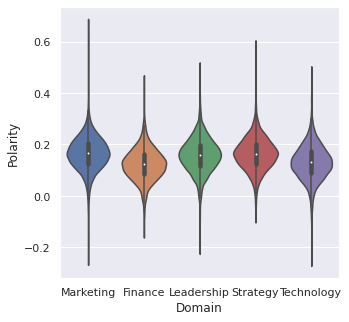

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.violinplot(x="Domain", y="Polarity", data=df)

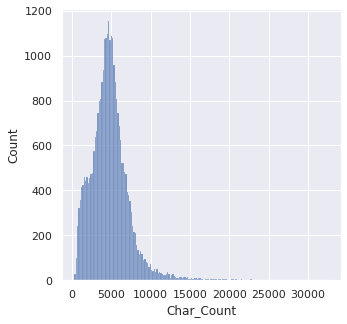

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.histplot( x ="Char_Count", data=df)

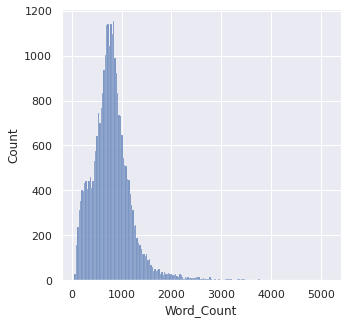

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.histplot( x ="Word_Count", data=df)

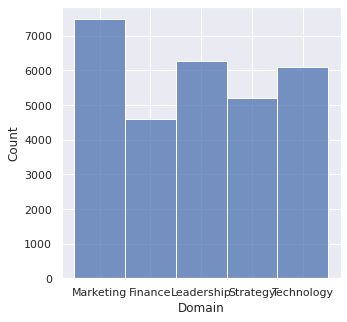

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.histplot( x ="Domain", data=df)

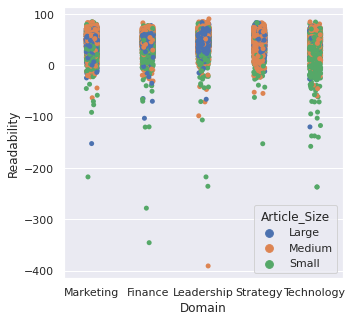

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.stripplot(x="Domain", y="Readability", hue="Article_Size", data=df)

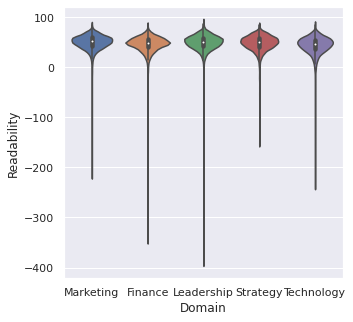

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.violinplot(x="Domain", y="Readability", data=df)

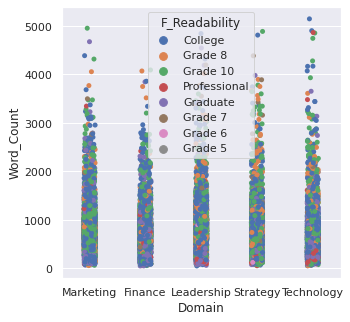

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.stripplot(x="Domain", y="Word_Count", hue="F_Readability", data=df)

#n-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Cleaned_Article'], 50)
#for word, freq in common_words:
    #print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Unigram' , 'count_uni'])
df2.head(20)

,Unigram,count_uni
0,business,101049
1,people,66771
2,time,65234
3,company,64344
4,related,61865
5,new,55170
6,make,55064
7,like,49368
8,work,43372
9,just,41021


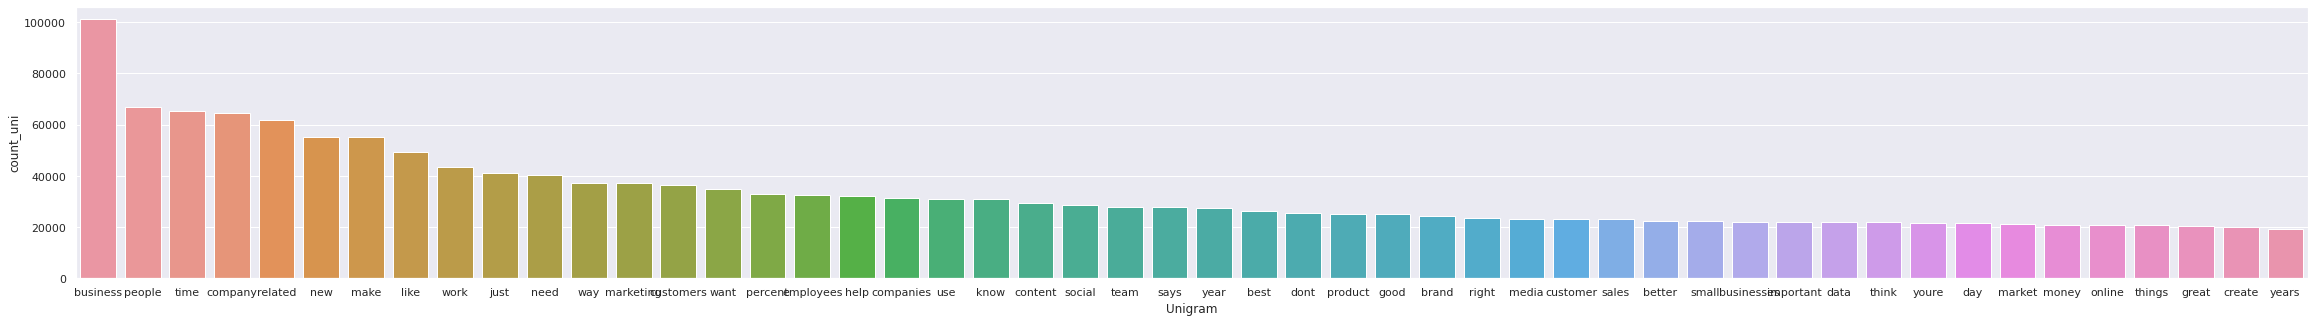

In [ ]:
sns.set(rc = {'figure.figsize':(40,5)})
sns.barplot(x="Unigram", y="count_uni", data=df2)

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Cleaned_Article'], 20)
df3 = pd.DataFrame(common_words, columns = ['Bigram' , 'count_bi'])
df3.head(20)

,Bigram,count_bi
0,social media,16219
1,make sure,8501
2,small business,7616
3,business owners,5912
4,long term,5020
5,small businesses,4605
6,new york,3870
7,related ways,3551
8,team members,3241
9,story originally,3188


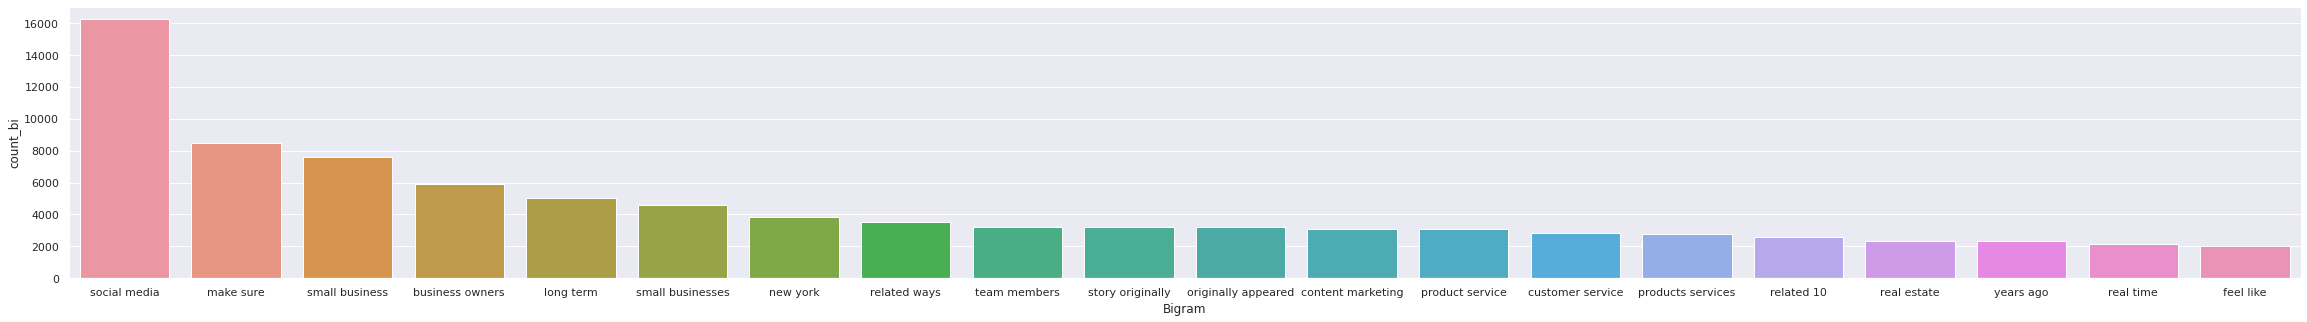

In [ ]:
sns.set(rc = {'figure.figsize':(40,5)})
sns.barplot(x="Bigram", y="count_bi", data=df3)

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_trigram(df['Cleaned_Article'], 20)
df4 = pd.DataFrame(common_words2, columns = ['Trigram' , 'count_tri'])
df4.head()

,Trigram,count_tri
0,one of the,10477
1,you need to,9468
2,you want to,7630
3,be able to,6103
4,as well as,5957


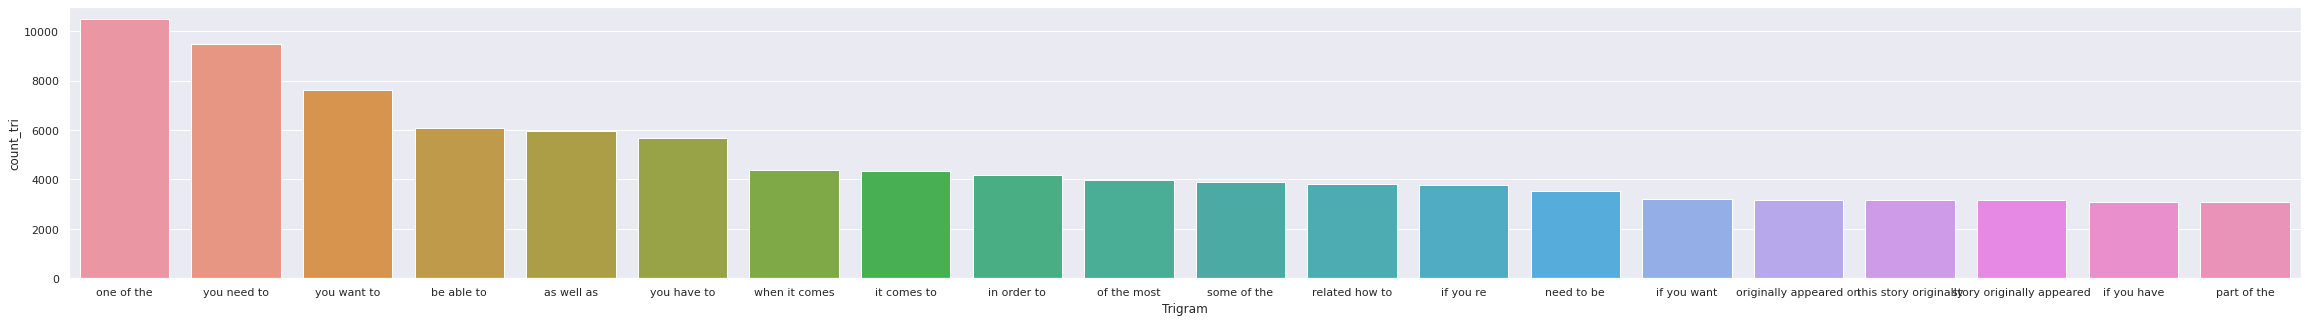

In [ ]:
sns.set(rc = {'figure.figsize':(40,5)})
sns.barplot(x="Trigram", y="count_tri", data=df4)

#POS

In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

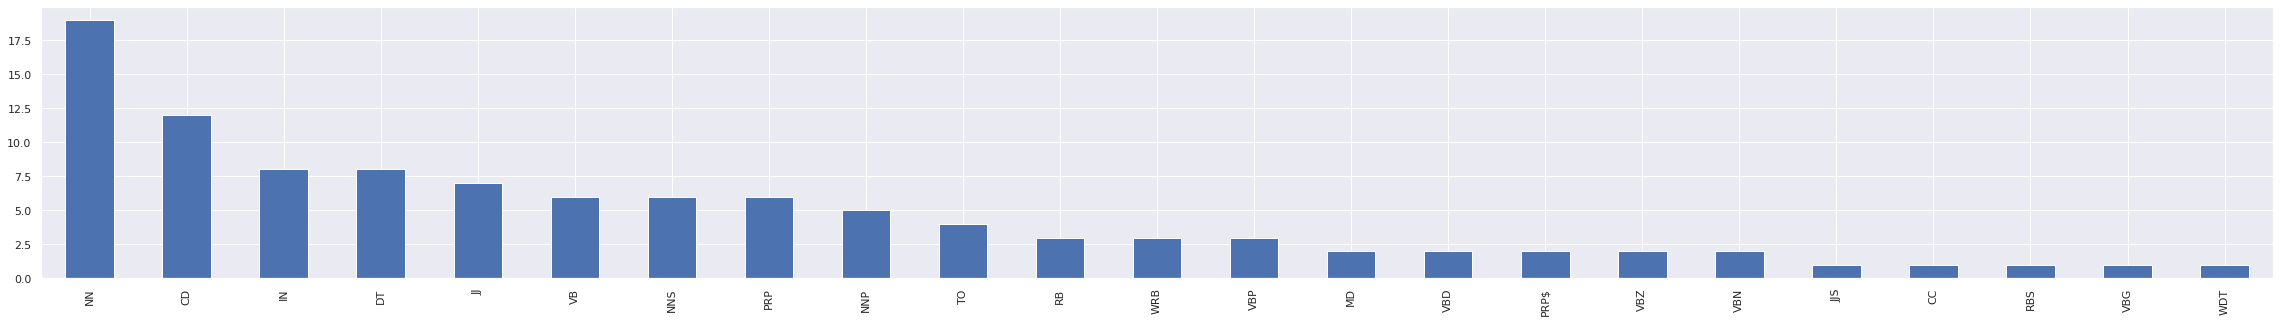

In [ ]:

blob = TextBlob(str(df['Cleaned_Article']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()#[:29631]
pos_df.plot(kind='bar')

#Save dataframe in CSV

In [ ]:
df.to_csv("Final_articles_EDA_June 26.csv",index=False)